## Exploração e análise de dados de crédito com SQL

Dados:

* idade = idade do cliente
* sexo = sexo do cliente (F ou M)
* dependentes = número de dependentes do cliente
* estado_civil= estado civil do cliente
* escolaridade = nível de escolaridade do cliente
* salario_anual = faixa salarial do cliente
* tipo_cartao = tipo de cartao do cliente
* qtd_produtos = quantidade de produtos comprados nos últimos 12 meses
* iteracoes_12m = quantidade de iterações/transacoes nos ultimos 12 meses
* meses_inativo_12m = quantidade de meses que o cliente ficou inativo
* limite_credito = limite de credito do cliente
* valor_transacoes_12m = valor das transações dos ultimos 12 meses
* qtd_transacoes_12m = quantidade de transacoes dos ultimos 12 meses

A tabela foi criada no AWS Athena junto com o S3 Bucket com uma versão dos dados disponibilizados em: https://github.com/andre-marcos-perez/ebac-course-utils/tree/main/dataset. 
A base de dados contém mais linhas do que a seleção utilizada. 

## Exploração de dados:

Vamos conhecer nossa amostra de dados. 

Primeiras 10 linhas da base de dados:

**Query**: Select * From "default"."credito" limit 10

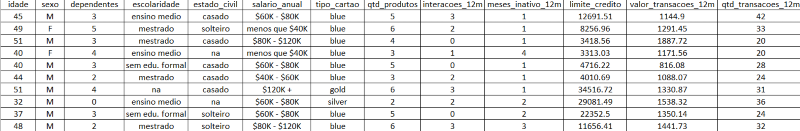

A base de dados possui valores nulos que estão especificados como (na) na tabela.

**Quantos clientes temos na base de dados?**

**Query**: Select count(*) From credito

Resposta: 2564 


**Quais os tipos de dados temos?**

**Query**: Describe credito

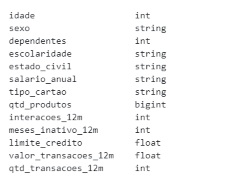

**Quais os tipos de escolidade temos na base de dados?**

**Query**: Select Distinct escolaridade From credito

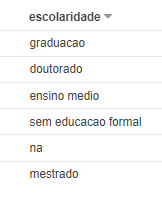





**Quais os tipos de estado civil temos na base de dados?**

**Query**: Select Distinct estado_civil From credito

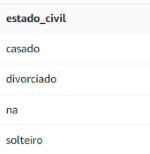

**Quais os tipos de cartão temos na base de dados?**

**Query**: Select Distinct tipo_cartao From credito

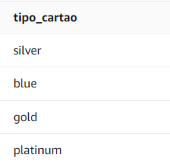

**Quais são as faixas salariais dos clientes da base de dados?**

**Query**: Select Distinct salario_anual From credito

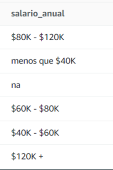

## Análise de dados:


Vamos entender melhor o perfil dos clientes da nossa base de dados.

* Em relação ao **sexo**, podemos observar que 61% são do sexo masculino e 31% do sexo feminino.

**Query**: Select count(*) As qtd_clientes,sexo From credito group by sexo

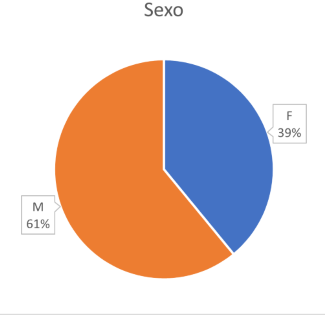

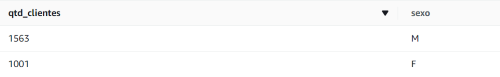

* Em relação à **escolaridade** temos que a maioria dos clientes (810) possuem mestrado.

**Query**: select count(*), escolaridade from credito group by escolaridade

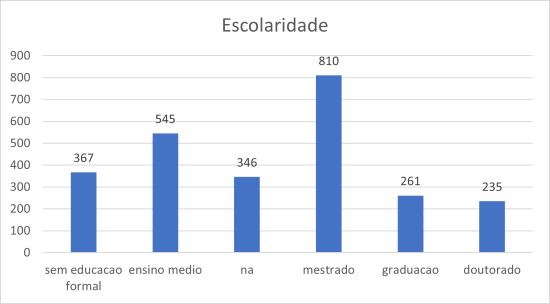

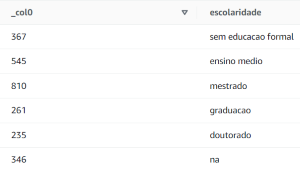

* Em relação ao **estado civil**, temos que 1521 clientes são casados.

**Query**: select count(*), estado_civil from credito group by estado_civil

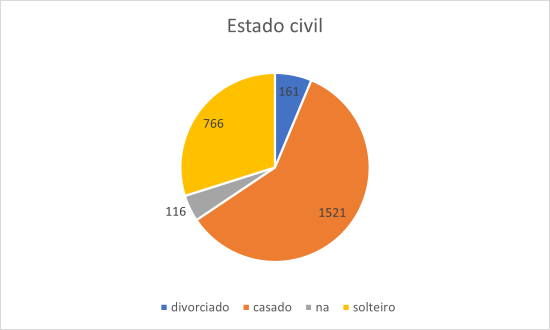
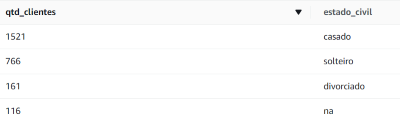

* Em relação à **faixa salarial**, temos que 701 clientes, a maioria, recebe até 40 mil anual.

**Query**: select count(*), salario_anual from credito group by salario_anual

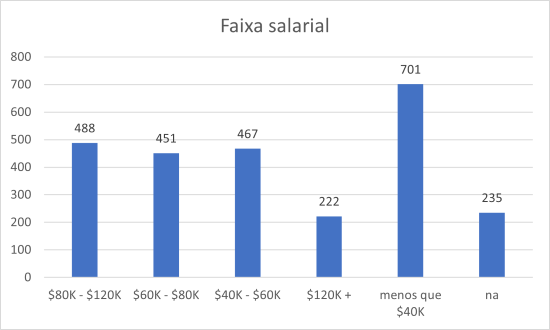
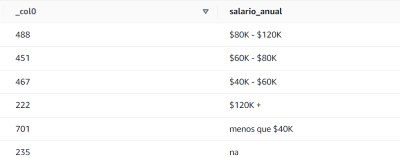


**Qual a relação entre o limite de credito com os valores das transações e o sexo dos clientes?**

**Query**:  select avg(valor_transacoes_12m) as media_valor_transacoes, avg(limite_credito) as media_limite_credito, sexo from credito group by sexo

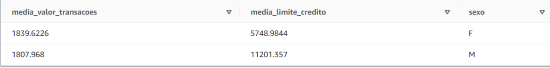

Podemos observar que os clientes do sexo masculino possuem praticamente o dobro do valor de limite de credito que as clientes do sexo feminino possuem e a média de valores das transações são praticamente iguais entre os dois sexos.

**O salário impacta no limite de crédito?**

**Query**: select avg(limite_credito) as media_limite, salario_anual from credito where salario_anual != 'na' group by salario_anual

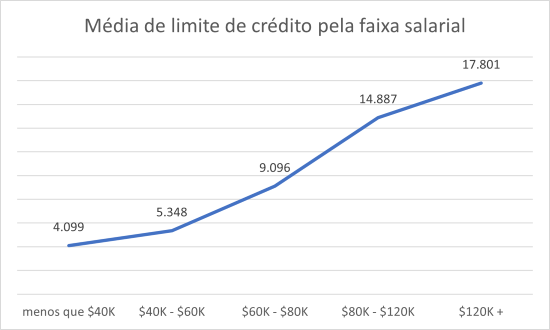
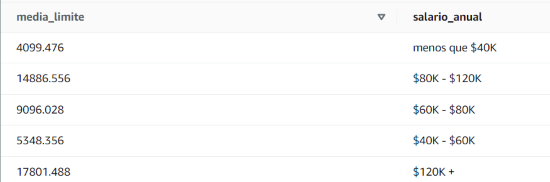

Podemos observar que sim o salário impacta no limite de crédito, pois quanto maior a faixa salarial maior o limite de crédito.


**Qual a distribuição da faixa salarial por sexo e a relação de limite de credito?**

**Query:** select count(*) as qtd_clientes, avg(limite_credito) as limite_credito, salario_anual,sexo From credito where salario_anual !='na' group by salario_anual, sexo

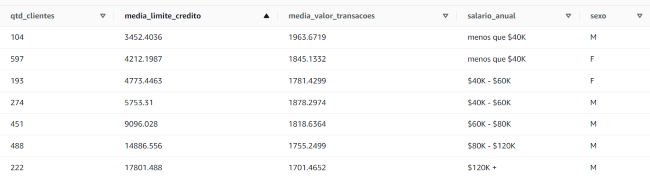

Na base de dados analisada temos que nas faixas salariais a cima de 60 mil anual não temos clientes do sexo feminino e a maioria delas ganha menos que 40 mil anual, já a maioria dos clientes do sexo masculino esta concentrada na faixa salarial de 80 a 120 mil anual e temos mais clientes do sexo masculino ganhando mais de 120 mil anual que aqueles que ganham menos de 40mil anual.


Como foi dito anteriormente o limite de credito aumenta com o aumento da faixa salarial, podemos observar que para as clientes do sexo feminino a diferença de limite de credito entre as que ganham menos de 40mil anual e as que ganham entre 40 e 60 mil é de 13% a mais e para os clientes do sexo masculino temos uma diferença de 40%. 

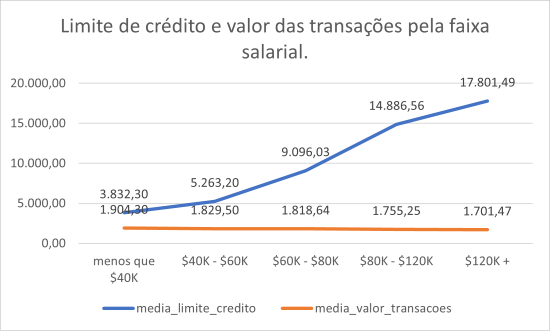

Através do gráfico podemos observar que os clientes que possuem limites de crédito e faixa salarial maiores tem valores de transações bem próximo aos outros clientes, que possuem limite de credito bem menor, por isso a empresa poderia utilizar estratégias de marketing para estimular uma maior utilização dos limites de crédito pelos clientes que possuem maior limite de crédito e maior faixa salarial. 

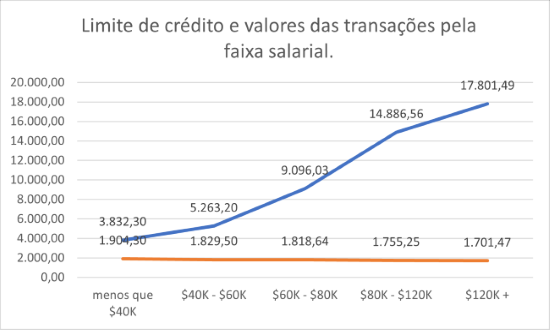
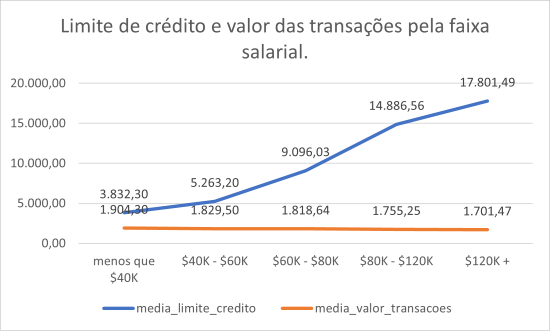

## Conclusão:

* A maioria dos clientes é do sexo masculino, possui mestrado, ganha menos de 40mil anual e é casado.
* Não temos grande diferença entre os valores de transações entre clientes do sexo masculino e feminino.
* Os clientes do sexo masculino possuem maior limite de crédito, em média 2x maior que o limite de credito das clientes do sexo feminino.
* O limite de crédito aumenta com o aumento da faixa salarial.
* As clientes do sexo feminino ganham até 60 mil anual e a maioria dos clientes do sexo masculino ganham mais de 80mil anual.
* Os valores de transações dos clientes que possuem maior limite de crédito é bem proximo dos valores de transações dos clientes que possuem limite de crédito menor.

